In [1]:
import re   # for regular expressions
import nltk # for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Try reading the file with a different encoding
file_path = 'D:\Program Files\PFE\SA_pipline\Airline-Sentiment-2-w-AA.csv'

# Try with 'latin1' encoding
try:
    data = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    # Try with 'iso-8859-1' encoding if 'latin1' fails
    data = pd.read_csv(file_path, encoding='iso-8859-1')

print(data.head())

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  681448150    False   finalized                   3      2/25/15 5:24   
1  681448153    False   finalized                   3      2/25/15 1:53   
2  681448156    False   finalized                   3     2/25/15 10:01   
3  681448158    False   finalized                   3      2/25/15 3:05   
4  681448159    False   finalized                   3      2/25/15 5:50   

  airline_sentiment  airline_sentiment:confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

   negativereason:confidence         airline airline_sentiment_gold  \
0                        NaN  Virgin America                    NaN  

In [3]:
data = data.loc[:, ['text', 'airline_sentiment']]
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


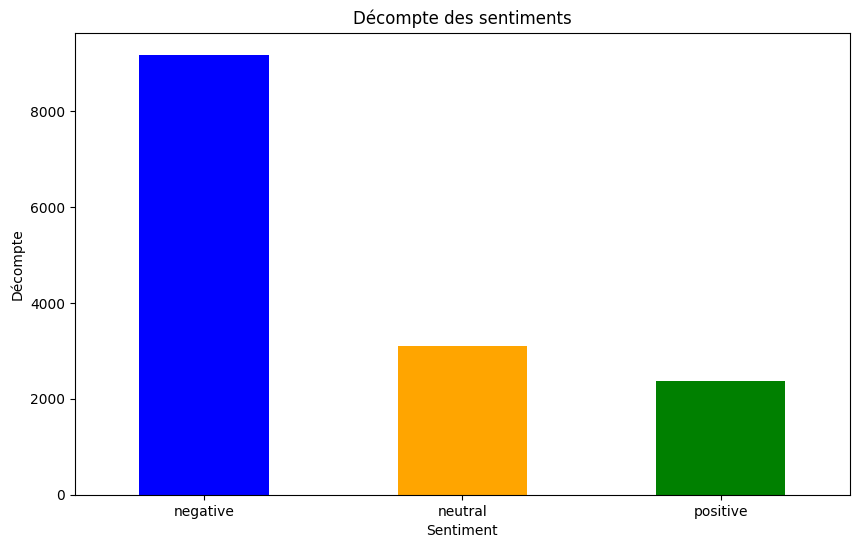

In [4]:
sentiment_counts = data['airline_sentiment'].value_counts()

# Créer un diagramme à barres
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Décompte des sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Décompte')
plt.xticks(rotation=0)  # Garder les étiquettes de l'axe x horizontales
plt.show()


In [5]:
data.describe()

,text,airline_sentiment
count,14640,14640
unique,14427,3
top,@united thanks,negative
freq,6,9178


In [6]:
data['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

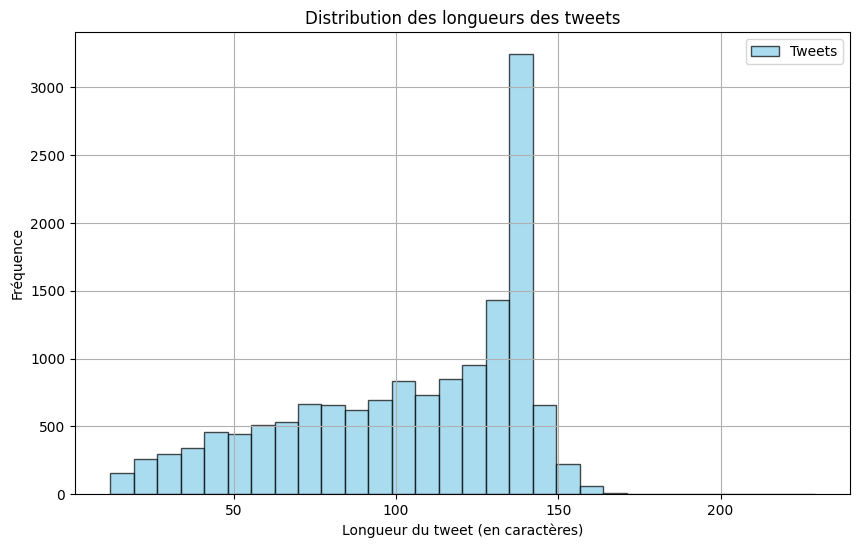

In [7]:
import matplotlib.pyplot as plt

# Calculer la longueur de chaque tweet
length_train = data['text'].str.len()

# Créer l'histogramme
plt.figure(figsize=(10, 6))  # Définir la taille de la figure
plt.hist(length_train, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label="Tweets")

# Ajouter des éléments descriptifs
plt.title("Distribution des longueurs des tweets")
plt.xlabel("Longueur du tweet (en caractères)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)  # Ajouter une grille pour faciliter la lecture

# Afficher le graphique
plt.show()


In [8]:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt

In [9]:
data['tweet'] = np.vectorize(remove_pattern)(data['text'].astype(str), "@[\w]*")
data=data[['tweet','airline_sentiment','text']]
data.head()

,tweet,airline_sentiment,text
0,What said.,neutral,@VirginAmerica What @dhepburn said.
1,plus you've added commercials to the experien...,positive,@VirginAmerica plus you've added commercials t...
2,I didn't today... Must mean I need to take an...,neutral,@VirginAmerica I didn't today... Must mean I n...
3,"it's really aggressive to blast obnoxious ""en...",negative,@VirginAmerica it's really aggressive to blast...
4,and it's a really big bad thing about it,negative,@VirginAmerica and it's a really big bad thing...


In [10]:
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"[^a-zA-Z#]", " ", x))
data.head(10)


,tweet,airline_sentiment,text
0,What said,neutral,@VirginAmerica What @dhepburn said.
1,plus you ve added commercials to the experien...,positive,@VirginAmerica plus you've added commercials t...
2,I didn t today Must mean I need to take an...,neutral,@VirginAmerica I didn't today... Must mean I n...
3,it s really aggressive to blast obnoxious en...,negative,@VirginAmerica it's really aggressive to blast...
4,and it s a really big bad thing about it,negative,@VirginAmerica and it's a really big bad thing...
5,seriously would pay a flight for seats th...,negative,@VirginAmerica seriously would pay $30 a fligh...
6,yes nearly every time I fly VX this ear w...,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,Really missed a prime opportunity for Men Wit...,neutral,@VirginAmerica Really missed a prime opportuni...
8,Well I didn t but NOW I DO D,positive,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D"
9,it was amazing and arrived an hour early Yo...,positive,"@VirginAmerica it was amazing, and arrived an ..."


In [11]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head(10)

,tweet,airline_sentiment,text
0,What said,neutral,@VirginAmerica What @dhepburn said.
1,plus added commercials experience tacky,positive,@VirginAmerica plus you've added commercials t...
2,didn today Must mean need take another trip,neutral,@VirginAmerica I didn't today... Must mean I n...
3,really aggressive blast obnoxious entertainmen...,negative,@VirginAmerica it's really aggressive to blast...
4,really thing about,negative,@VirginAmerica and it's a really big bad thing...
5,seriously would flight seats that didn have th...,negative,@VirginAmerica seriously would pay $30 a fligh...
6,nearly every time this worm away,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,Really missed prime opportunity Without Hats p...,neutral,@VirginAmerica Really missed a prime opportuni...
8,Well didn,positive,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D"
9,amazing arrived hour early good,positive,"@VirginAmerica it was amazing, and arrived an ..."


In [12]:
tokenized_tweet = data['tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0                                         [What, said]
1        [plus, added, commercials, experience, tacky]
2    [didn, today, Must, mean, need, take, another,...
3    [really, aggressive, blast, obnoxious, enterta...
4                               [really, thing, about]
Name: tweet, dtype: object

In [13]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming


In [14]:
for i in range(len(tokenized_tweet)):
       tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
data['tweet'] = tokenized_tweet


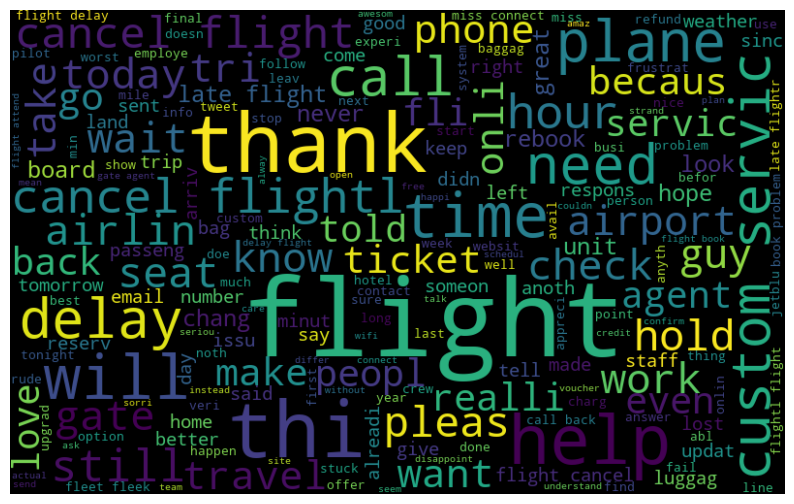

In [15]:
all_words = ' '.join([text for text in data['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
import re
import pandas as pd

# Fonction pour extraire les hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# Extraction des hashtags pour chaque catégorie d'émotion
HT_neutral = hashtag_extract(data['tweet'][data['airline_sentiment'] == 'neutral'])
HT_positive = hashtag_extract(data['tweet'][data['airline_sentiment'] == 'positive'])
HT_negative = hashtag_extract(data['tweet'][data['airline_sentiment'] == 'negative'])

# Déplier les listes de hashtags
HT_neutral = sum(HT_neutral, [])
HT_positive = sum(HT_positive, [])
HT_negative = sum(HT_negative, [])

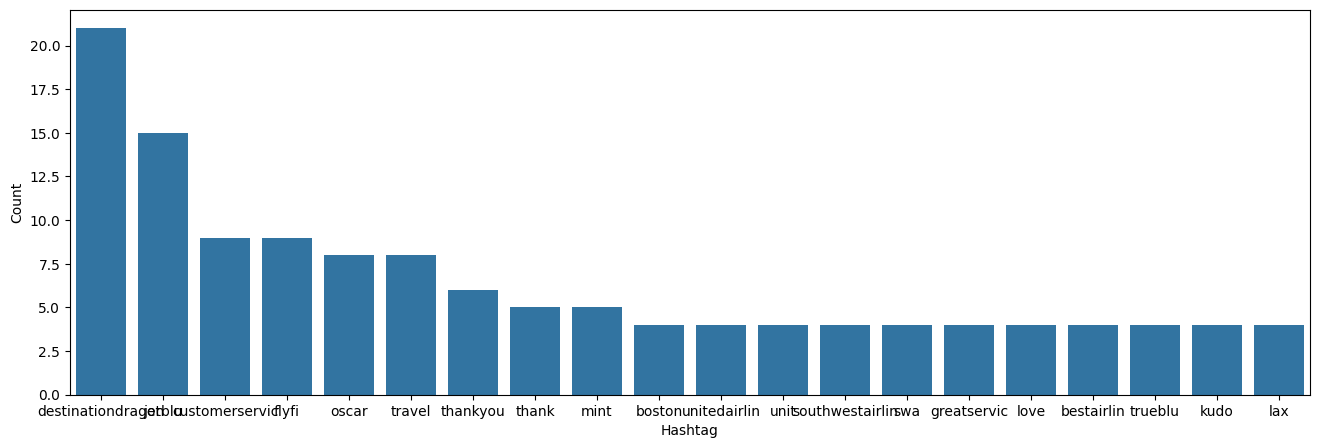

In [17]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
plt.show()


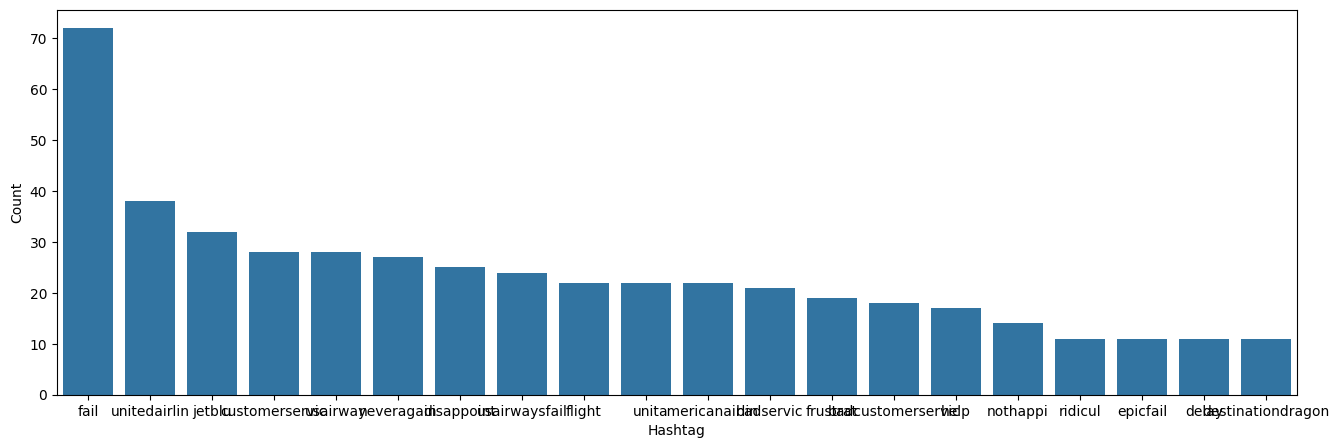

In [18]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

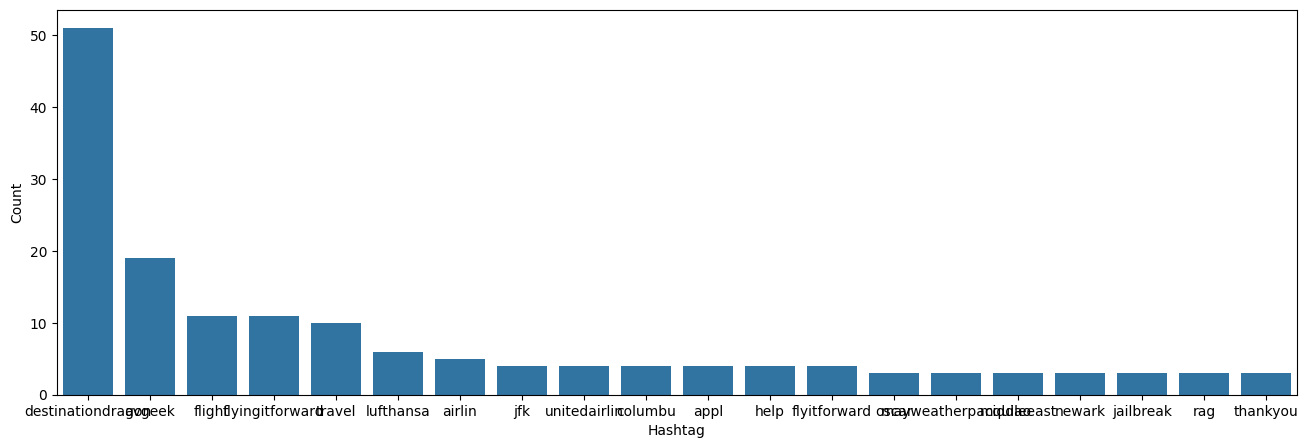

In [19]:
b = nltk.FreqDist(HT_neutral)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [19]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['tweet'])
bow.shape


(14640, 1000)

In [20]:
# Remplacement des étiquettes par des valeurs numériques
label_mapping = {
    "neutral": 1,
    "positive": 2,
    "negative": 0
}
data['label_numeric'] = data['airline_sentiment'].map(label_mapping)
X = bow  # Features
y = data['label_numeric']  # Labels

In [21]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Entraîner un modèle de classification (exemple avec Random Forest)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher un rapport de classification détaillé
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7547814207650273
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1889
           1       0.55      0.51      0.53       580
           2       0.68      0.64      0.66       459

    accuracy                           0.75      2928
   macro avg       0.69      0.67      0.68      2928
weighted avg       0.75      0.75      0.75      2928



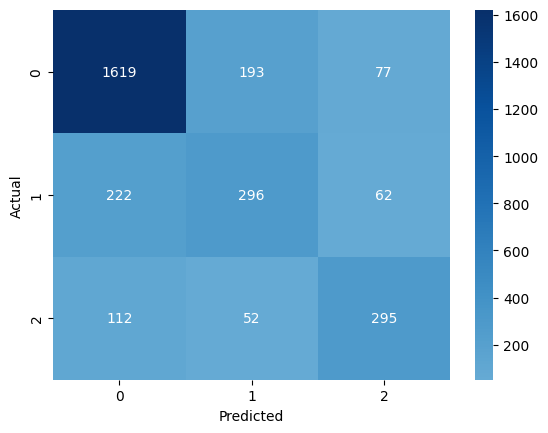

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_pred)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



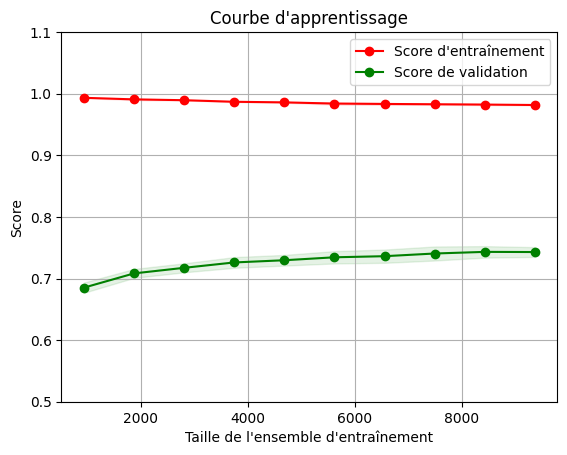

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


rf = RandomForestClassifier(n_estimators=400, random_state=11)

# Obtenir les scores d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculer les moyennes et les écarts types des scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.ylim((0.5, 1.1))
plt.grid()

# Tracer les courbes avec les écarts types
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")

plt.legend(loc="best")
plt.show()


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Initialisation du modèle de régression logistique avec OneVsRestClassifier
lreg = OneVsRestClassifier(LogisticRegression())

# Entraînement du modèle sur l'ensemble d'entraînement
lreg.fit(X_train, y_train)

# Prédiction des probabilités sur l'ensemble de test
predictionlreg = lreg.predict_proba(X_test)

# Pour un problème multiclasse, nous prenons la classe avec la probabilité la plus élevée
y_predlreg = np.argmax(predictionlreg, axis=1)

# Binarisation des étiquettes pour le calcul de l'AUC-ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calcul du F1 score pour l'ensemble de validation
f1 = f1_score(y_test, y_predlreg, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy = accuracy_score(y_test, y_predlreg)

# Calcul de l'AUC-ROC pour l'ensemble de validation
auc_roc = roc_auc_score(y_test_binarized, predictionlreg, average='macro')

# Validation croisée pour obtenir la précision moyenne (CV-Accuracy)
cv_scores = cross_val_score(lreg, X_train, y_train, cv=5)
cv_accuracy = cv_scores.mean()

# Affichage des métriques
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("AUC-ROC (macro):", auc_roc)
print("CV-Accuracy:", cv_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_predlreg))


F1 Score: 0.7889344262295082
Accuracy: 0.7889344262295082
AUC-ROC (macro): 0.8921921863781604
CV-Accuracy: 0.7661359508655068
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.53      0.57       580
           2       0.74      0.67      0.70       459

    accuracy                           0.79      2928
   macro avg       0.73      0.70      0.71      2928
weighted avg       0.78      0.79      0.78      2928



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report

from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Initialisation du modèle de régression logistique avec OneVsRestClassifier
lreg = OneVsRestClassifier(LogisticRegression())

# Entraînement du modèle sur l'ensemble d'entraînement
lreg.fit(X_train, y_train)

# Prédiction des probabilités sur l'ensemble de test
predictionlreg = lreg.predict_proba(X_test)

# Pour un problème multiclasse, nous prenons la classe avec la probabilité la plus élevée
# avec un seuil de 0.3 pour le cas binaire on ajuste pour multiclasse
threshold = 0.3
prediction_int = (predictionlreg >= threshold).astype(int)

# On doit ajuster pour prendre la classe ayant la probabilité maximale
# En multiclasse, nous devons considérer la classe avec la probabilité la plus élevée
# Utilisation de l'indice de la probabilité maximale pour chaque exemple
y_predlreg = np.argmax(predictionlreg, axis=1)

# Calcul du F1 score pour l'ensemble de validation
f1 = f1_score(y_test, y_predlreg, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy = accuracy_score(y_test, y_predlreg)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_predlreg))


F1 Score: 0.7889344262295082
Accuracy: 0.7889344262295082
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.53      0.57       580
           2       0.74      0.67      0.70       459

    accuracy                           0.79      2928
   macro avg       0.73      0.70      0.71      2928
weighted avg       0.78      0.79      0.78      2928



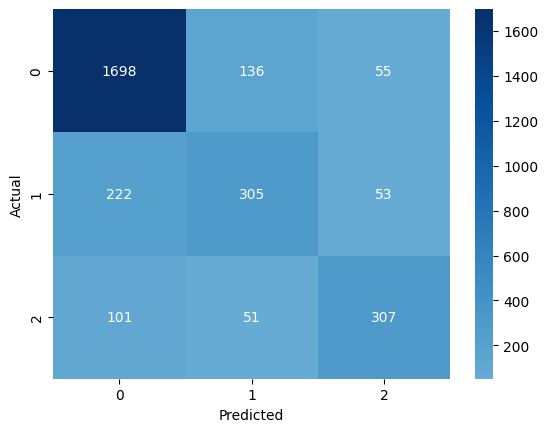

In [30]:
y_predlreg = lreg.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_predlreg)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [24]:
from sklearn import svm
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Initialiser et entraîner le modèle SVM avec un noyau linéaire
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train)

# Prédiction des probabilités sur l'ensemble de test
prediction = svc.predict_proba(X_test)

# Trouver la classe avec la probabilité la plus élevée pour chaque échantillon
y_predsvm = np.argmax(prediction, axis=1)

# Binarisation des étiquettes pour le calcul de l'AUC-ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calcul du F1 score pour l'ensemble de validation
f1SVM = f1_score(y_test, y_predsvm, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_SVM = accuracy_score(y_test, y_predsvm)

# Calcul de l'AUC-ROC pour l'ensemble de validation
auc_roc_SVM = roc_auc_score(y_test_binarized, prediction, average='macro')

# Validation croisée pour obtenir la précision moyenne (CV-Accuracy)
cv_scores_SVM = cross_val_score(svc, X_train, y_train, cv=5)
cv_accuracy_SVM = cv_scores_SVM.mean()

# Affichage des métriques
print("F1 Score:", f1SVM)
print("Accuracy:", accuracy_SVM)
print("AUC-ROC (macro):", auc_roc_SVM)
print("CV-Accuracy:", cv_accuracy_SVM)
print("Classification Report:")
print(classification_report(y_test, y_predsvm))


F1 Score: 0.7838114754098361
Accuracy: 0.7838114754098361
AUC-ROC (macro): 0.8875369587733345
CV-Accuracy: 0.7536698700600988
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1889
           1       0.62      0.51      0.56       580
           2       0.74      0.67      0.70       459

    accuracy                           0.78      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.77      0.78      0.78      2928



In [31]:
from sklearn import svm
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# Initialiser et entraîner le modèle SVM avec un noyau linéaire
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train)

# Prédiction des probabilités sur l'ensemble de test
prediction = svc.predict_proba(X_test)

# Trouver la classe avec la probabilité la plus élevée pour chaque échantillon
y_predsvm = np.argmax(prediction, axis=1)

# Calcul du F1 score pour l'ensemble de validation
f1SVM = f1_score(y_test, y_predsvm, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_SVM = accuracy_score(y_test, y_predsvm)

print("F1 Score:", f1SVM)
print("Accuracy:", accuracy_SVM)
print("Classification Report:")
print(classification_report(y_test, y_predsvm))

F1 Score: 0.7838114754098361
Accuracy: 0.7838114754098361
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1889
           1       0.62      0.48      0.54       580
           2       0.74      0.67      0.70       459

    accuracy                           0.78      2928
   macro avg       0.73      0.69      0.70      2928
weighted avg       0.77      0.78      0.78      2928



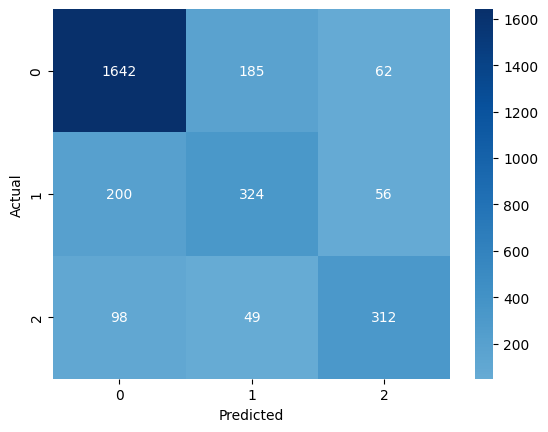

In [32]:
y_predsvm = svc.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_predsvm)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Supposons que 'bow' représente les features extraites avec Bag-of-Words
# et 'df['label_numeric']' représente les labels numériques.


# Entraînement du modèle XGBoost
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)
xgb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
prediction_XGB = xgb_model.predict(X_test)

# Calcul du F1 score pour l'ensemble de validation
f1_XGB = f1_score(y_test, prediction_XGB, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_XGB = accuracy_score(y_test, prediction_XGB)

print("F1 Score:", f1_XGB)
print("Accuracy:", accuracy_XGB)
print("Classification Report:")
print(classification_report(y_test, prediction_XGB))


F1 Score: 0.7810792349726776
Accuracy: 0.7810792349726776
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1889
           1       0.60      0.54      0.57       580
           2       0.71      0.70      0.70       459

    accuracy                           0.78      2928
   macro avg       0.72      0.70      0.71      2928
weighted avg       0.78      0.78      0.78      2928



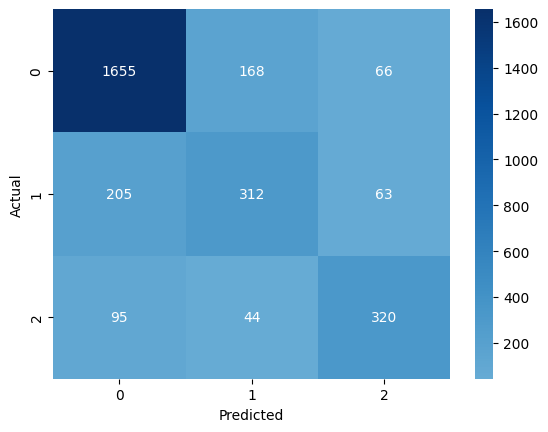

In [34]:
y_predxgb = xgb_model.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_predxgb)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier


# Initialiser et entraîner le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
prediction_knn = knn_model.predict(X_test)

# Calcul du F1 score pour l'ensemble de validation
f1_knn = f1_score(y_test, prediction_knn, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_knn = accuracy_score(y_test, prediction_knn)

print("F1 Score:", f1_knn)
print("Accuracy:", accuracy_knn)

print("Classification Report:")
print(classification_report(y_test, prediction_knn))


F1 Score: 0.5990437158469946
Accuracy: 0.5990437158469946
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      1889
           1       0.32      0.61      0.42       580
           2       0.63      0.53      0.58       459

    accuracy                           0.60      2928
   macro avg       0.59      0.58      0.56      2928
weighted avg       0.69      0.60      0.62      2928



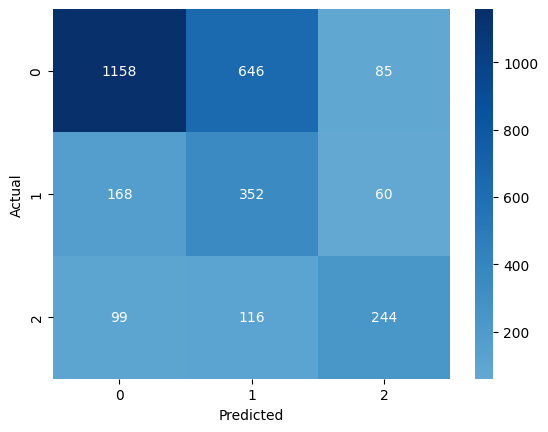

In [36]:
y_predknn = knn_model.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_predknn)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize

# Initialiser et entraîner le modèle Naive Bayes multinomial
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
prediction_nb = nb_model.predict(X_test)
prediction_nb_proba = nb_model.predict_proba(X_test)

# Binarisation des étiquettes pour le calcul de l'AUC-ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calculer le F1 score et l'accuracy
f1_nb = f1_score(y_test, prediction_nb, average='micro')
accuracy_nb = accuracy_score(y_test, prediction_nb)

# Calcul de l'AUC-ROC pour l'ensemble de validation
auc_roc_nb = roc_auc_score(y_test_binarized, prediction_nb_proba, average='macro')

# Validation croisée pour obtenir la précision moyenne (CV-Accuracy)
cv_scores_nb = cross_val_score(nb_model, X_train, y_train, cv=5)
cv_accuracy_nb = cv_scores_nb.mean()

# Affichage des métriques
print("F1 Score:", f1_nb)
print("Accuracy:", accuracy_nb)
print("AUC-ROC (macro):", auc_roc_nb)
print("CV-Accuracy:", cv_accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, prediction_nb))


F1 Score: 0.7640027322404372
Accuracy: 0.7640027322404371
AUC-ROC (macro): 0.879580547956404
CV-Accuracy: 0.7434252436441489
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1889
           1       0.57      0.46      0.51       580
           2       0.71      0.69      0.70       459

    accuracy                           0.76      2928
   macro avg       0.70      0.67      0.69      2928
weighted avg       0.75      0.76      0.76      2928



In [37]:
from sklearn.naive_bayes import MultinomialNB
# Initialiser et entraîner le modèle Naive Bayes multinomial
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
prediction_nb = nb_model.predict(X_test)

# Calculer le F1 score et l'accuracy
f1_nb = f1_score(y_test, prediction_nb, average='micro')
accuracy_nb = accuracy_score(y_test, prediction_nb)

print("F1 Score:", f1_nb)
print("Accuracy:", accuracy_nb)
print("Classification Report:")
print(classification_report(y_test, prediction_nb))

F1 Score: 0.7640027322404372
Accuracy: 0.7640027322404371
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1889
           1       0.57      0.46      0.51       580
           2       0.71      0.69      0.70       459

    accuracy                           0.76      2928
   macro avg       0.70      0.67      0.69      2928
weighted avg       0.75      0.76      0.76      2928



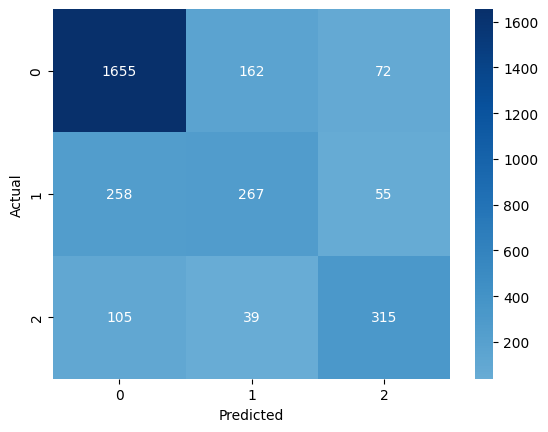

In [38]:
y_prednb = nb_model.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_prednb)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

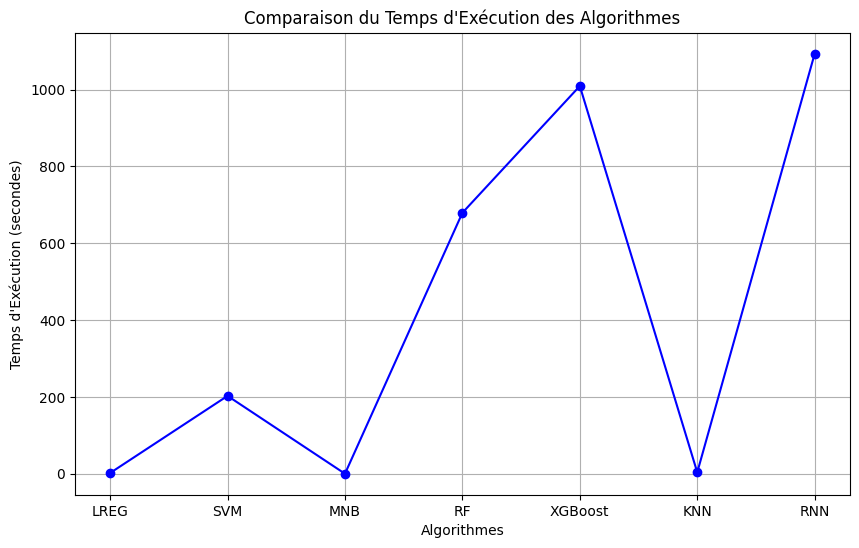

In [2]:
import matplotlib.pyplot as plt

# Données
algorithmes = ['LREG', 'SVM', 'MNB', 'RF', 'XGBoost', 'KNN', 'RNN']
temps_execution = [2.0, 202.7, 0.1, 679.3, 1009.3, 3.7, 1093.4]  # Temps en secondes

# Création de la figure
plt.figure(figsize=(10, 6))

# Tracé de la courbe
plt.plot(algorithmes, temps_execution, marker='o', linestyle='-', color='b')

# Ajout des titres et des labels
plt.title("Comparaison du Temps d'Exécution des Algorithmes")
plt.xlabel("Algorithmes")
plt.ylabel("Temps d'Exécution (secondes)")

# Affichage de la courbe
plt.grid(True)
plt.show()


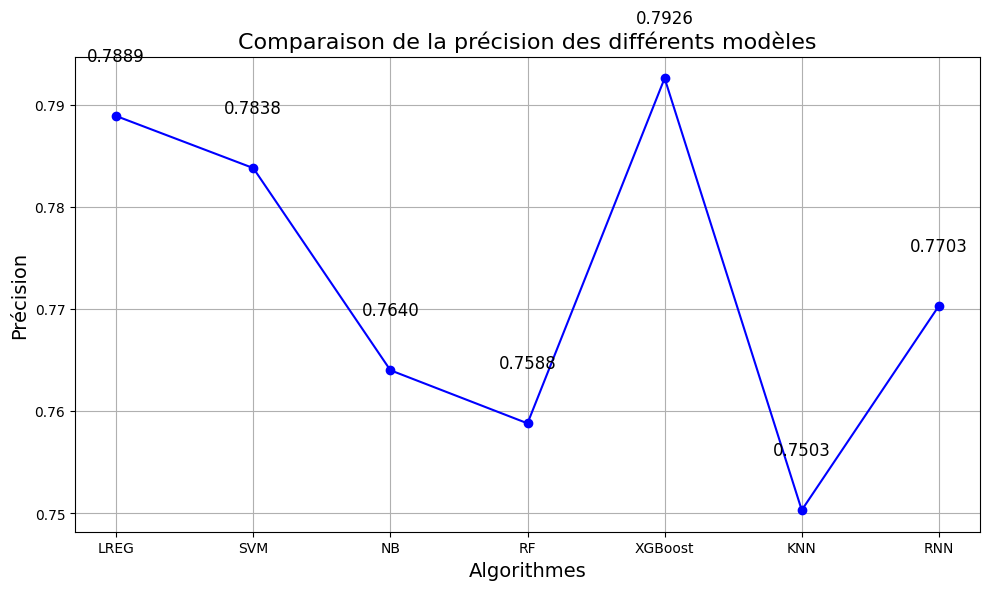

In [4]:
import matplotlib.pyplot as plt

# Données
algorithms = ['LREG', 'SVM', 'NB', 'RF', 'XGBoost', 'KNN', 'RNN']
accuracy = [0.7889, 0.7838, 0.7640, 0.7588, 0.7926, 0.7503, 0.7703]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(algorithms, accuracy, marker='o', linestyle='-', color='b')

# Ajout des labels et du titre
plt.title('Comparaison de la précision des différents modèles', fontsize=16)
plt.xlabel('Algorithmes', fontsize=14)
plt.ylabel('Précision', fontsize=14)

# Ajout des valeurs sur les points
for i, value in enumerate(accuracy):
    plt.text(i, value + 0.005, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

# Ajustement de la mise en page
plt.grid(True)
plt.tight_layout()

# Affichage du graphique
plt.show()
